In [3]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [4]:
import random
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer
from IPython.display import Image

plt.style.use("fivethirtyeight")

<IPython.core.display.Javascript object>

In [5]:
plt.rcParams["figure.figsize"] = (12, 4)
plt.rcParams.update({"font.size": 14})
pd.set_option("display.precision", 2)

<IPython.core.display.Javascript object>

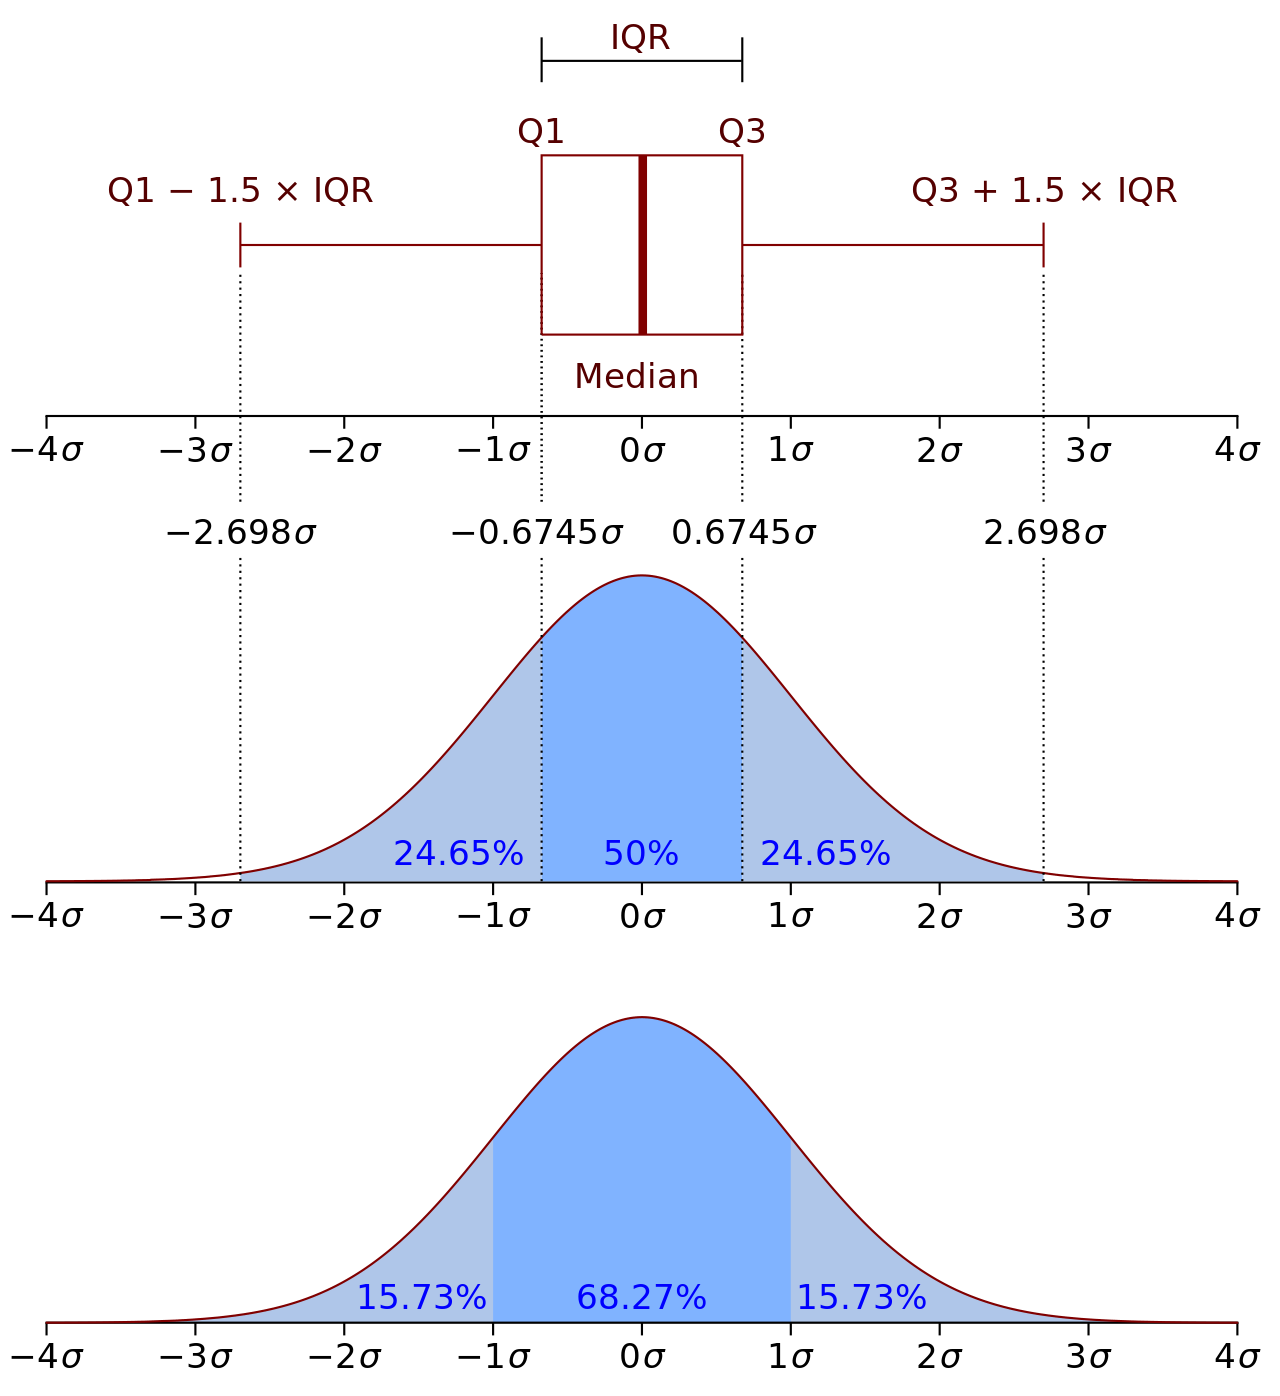

<IPython.core.display.Javascript object>

In [6]:
Image("images/quantiles.png", width=400)

<a href="https://en.wikipedia.org/wiki/Probability_density_function#/media/File:Boxplot_vs_PDF.svg">Quantiles Wikipedia</a>


In [7]:
sensor = np.random.normal(50, 10, 10000)
timestamp = ["t_" + str(i) for i in range(len(sensor))]
df = pd.DataFrame({"timestamp": timestamp, "sensor": sensor})
df.head(10)

,timestamp,sensor
0,t_0,48.07
1,t_1,50.02
2,t_2,57.68
3,t_3,43.51
4,t_4,44.51
5,t_5,32.90
6,t_6,52.96
7,t_7,71.52
8,t_8,33.50
9,t_9,48.18


<IPython.core.display.Javascript object>

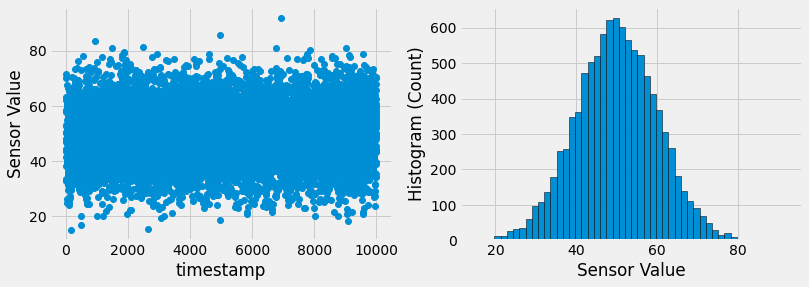

<IPython.core.display.Javascript object>

In [8]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(df["sensor"], "o")
plt.xlabel("timestamp")
plt.ylabel("Sensor Value")
plt.subplot(1, 2, 2)
plt.hist(df["sensor"].values, bins=50, edgecolor="black")
plt.xlabel("Sensor Value")
plt.ylabel("Histogram (Count)")
plt.show()

In [12]:
print("Median is ", round(df["sensor"].median(), 2))

quantile_list = [0, 0.25, 0.5, 0.75, 1.0]
quantiles = df["sensor"].quantile(quantile_list)

df["sensor_quantile"] = pd.qcut(
    df["sensor"], quantile_list, labels=["1st", "2nd", "3rd", "4th"]
)
print(quantiles)

Median is  49.92
0.00    15.18
0.25    43.11
0.50    49.92
0.75    56.74
1.00    91.95
Name: sensor, dtype: float64


<IPython.core.display.Javascript object>

In [42]:
df.head(10)

,timestamp,sensor,sensor_quantile
0,t_0,40.184013,1st
1,t_1,44.059282,2nd
2,t_2,57.160237,4th
3,t_3,51.773008,3rd
4,t_4,46.436468,2nd
5,t_5,58.946407,4th
6,t_6,70.844171,4th
7,t_7,45.881821,2nd
8,t_8,38.664042,1st
9,t_9,70.340981,4th


<IPython.core.display.Javascript object>

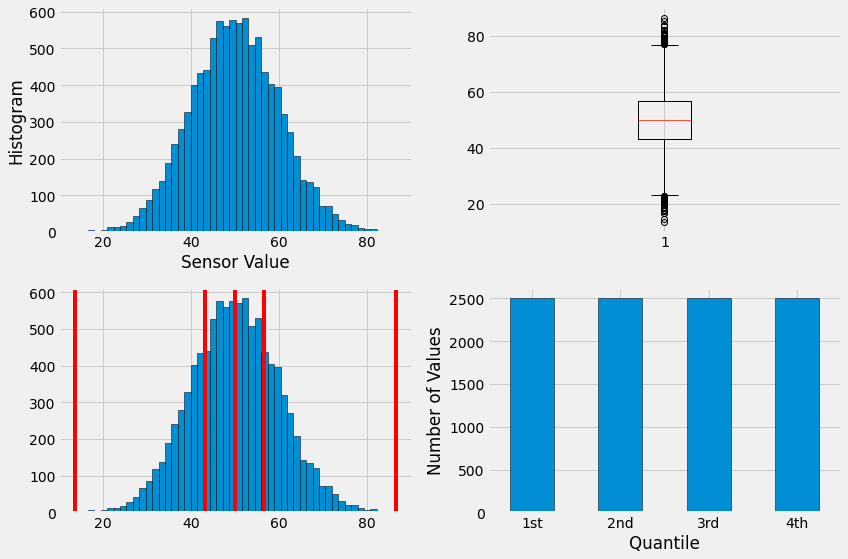

<IPython.core.display.Javascript object>

In [46]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.hist(df["sensor"], bins=50, edgecolor="black")
plt.xlabel("Sensor Value")
plt.ylabel("Histogram")
plt.subplot(2, 2, 2)
plt.boxplot(df["sensor"].values)
# plt.xlabel("")
# plt.ylabel("")
plt.subplot(2, 2, 3)
plt.hist(df["sensor"], bins=50, edgecolor="black")
for quantile in quantiles:
    plt.axvline(quantile, color="r")
plt.subplot(2, 2, 4)
df["sensor_quantile"].value_counts().plot(kind="bar", rot=0, edgecolor="black")
plt.xlabel("Quantile")
plt.ylabel("Number of Values")
plt.tight_layout()

In [14]:
quantile_list = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
quantiles = df["sensor"].quantile(quantile_list)

df["sensor_quantile"] = pd.qcut(
    df["sensor"], quantile_list, labels=["1st", "2nd", "3rd", "4th", "5th"]
)

print(quantiles)

0.0    15.18
0.2    41.58
0.4    47.43
0.6    52.43
0.8    58.38
1.0    91.95
Name: sensor, dtype: float64


<IPython.core.display.Javascript object>

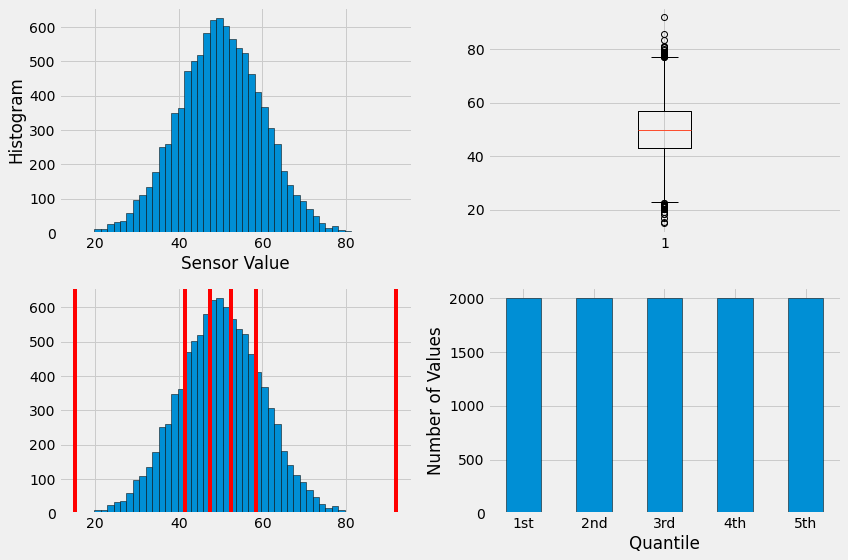

<IPython.core.display.Javascript object>

In [15]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.hist(df["sensor"], bins=50, edgecolor="black")
plt.xlabel("Sensor Value")
plt.ylabel("Histogram")
plt.subplot(2, 2, 2)
plt.boxplot(df["sensor"].values)
# plt.xlabel("")
# plt.ylabel("")
plt.subplot(2, 2, 3)
plt.hist(df["sensor"], bins=50, edgecolor="black")
for quantile in quantiles:
    plt.axvline(quantile, color="r")
plt.subplot(2, 2, 4)
df["sensor_quantile"].value_counts().plot(kind="bar", rot=0, edgecolor="black")
plt.xlabel("Quantile")
plt.ylabel("Number of Values")
plt.tight_layout()